In [1]:
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv("imdb-top-1000.csv")
ipl = pd.read_csv("ipl-matches.csv")

In [3]:
movies.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,300,2006,117,Action,7.6,Zack Snyder,Gerard Butler,732876,210614939,52.0
1,1917,2019,119,Drama,8.3,Sam Mendes,Dean-Charles Chapman,425844,159227644,78.0
2,(500) Days of Summer,2009,95,Comedy,7.7,Marc Webb,Zooey Deschanel,472242,32391374,76.0
3,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000,96.0
4,12 Years a Slave,2013,134,Biography,8.1,Steve McQueen,Chiwetel Ejiofor,640533,56671993,96.0


In [4]:
genre = movies.groupby("Genre")
genre

In [5]:
genre.sum(numeric_only=True) # summing all the columnms on basis of genre 

,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
Genre,,,,,
Action,22196,1367.3,72282412,32632261314,10499.0
Adventure,9656,571.5,22576163,9496922464,5020.0
Animation,8166,650.3,21978630,14631473048,6082.0
Biography,11970,698.6,24006844,8276357606,6023.0
Comedy,17380,1224.7,27620327,15663868165,9840.0
Crime,13524,857.8,33533615,8452631908,6706.0
Drama,36049,2299.7,61367304,35409974041,19208.0
Family,215,15.6,551221,439110554,158.0
Fantasy,170,16.0,146222,782726696,0.0


### Top rated Movies in each group of genre

In [6]:
result = genre.apply(lambda x: x.loc[x['IMDB_Rating'].idxmax()],include_groups=False)
result


,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,The Dark Knight,2008,152,9.0,Christopher Nolan,Christian Bale,2303232,534858444,84.0
Adventure,Interstellar,2014,169,8.6,Christopher Nolan,Matthew McConaughey,1512360,188020017,74.0
Animation,Sen to Chihiro no kamikakushi,2001,125,8.6,Hayao Miyazaki,Daveigh Chase,651376,10055859,96.0
Biography,Schindler's List,1993,195,8.9,Steven Spielberg,Liam Neeson,1213505,96898818,94.0
Comedy,Gisaengchung,2019,132,8.6,Bong Joon Ho,Kang-ho Song,552778,53367844,96.0
Crime,The Godfather,1972,175,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411,100.0
Drama,The Shawshank Redemption,1994,142,9.3,Frank Darabont,Tim Robbins,2343110,28341469,80.0
Family,E.T. the Extra-Terrestrial,1982,115,7.8,Steven Spielberg,Henry Thomas,372490,435110554,91.0
Fantasy,Das Cabinet des Dr. Caligari,1920,76,8.1,Robert Wiene,Werner Krauss,57428,337574718,NaN


In [7]:
# find the top 3 genre byt total earning
genre["Gross"].sum(numeric_only=True).sort_values(ascending=False).head(3)

Genre
Drama     35409974041
Action    32632261314
Comedy    15663868165
Name: Gross, dtype: int64

In [8]:
# find the genre of with highest imdb rating
genre.apply(lambda x : x.loc[x["IMDB_Rating"].idxmax()],include_groups=False).head(1)

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,The Dark Knight,2008,152,9.0,Christopher Nolan,Christian Bale,2303232,534858444,84.0


In [9]:
movies.groupby("Director")["No_of_Votes"].sum().sort_values(ascending=False).head(1)

Director
Christopher Nolan    11578345
Name: No_of_Votes, dtype: int64

In [10]:
# find the genre of with highest avg imdb rating
movies.groupby("Genre")["IMDB_Rating"].mean().sort_values(ascending=False).head(1)

Genre
Western    8.35
Name: IMDB_Rating, dtype: float64

In [11]:
# find the no of movies done by each actor
pd.DataFrame(movies["Star1"].value_counts().sort_values(ascending=True))

,count
Star1,
Walter Matthau,1
Bruce Lee,1
Sridevi,1
Jude Law,1
Rolf Lassgård,1
...,...
Leonardo DiCaprio,9
Al Pacino,10
Clint Eastwood,10


In [12]:
movies.groupby("Star1")["Series_Title"].count().sort_values()

Star1
Jonathan Pryce       1
Martin Freeman       1
Marjane Satrapi      1
Marion Cotillard     1
Mario Casas          1
                    ..
Humphrey Bogart      9
Al Pacino           10
Clint Eastwood      10
Robert De Niro      11
Tom Hanks           12
Name: Series_Title, Length: 660, dtype: int64

### Groupby attributes

In [13]:
# find total no of groups --> len
len(movies.groupby("Genre"))

14

In [14]:
movies["Genre"].nunique()

14

In [15]:
movies.groupby("Genre").size()

Genre
Action       172
Adventure     72
Animation     82
Biography     88
Comedy       155
Crime        107
Drama        289
Family         2
Fantasy        2
Film-Noir      3
Horror        11
Mystery       12
Thriller       1
Western        4
dtype: int64

In [16]:
genre = movies.groupby("Genre")

In [17]:
genre.first() # first movie of every genre

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,300,2006,117,7.6,Zack Snyder,Gerard Butler,732876,210614939,52.0
Adventure,2001: A Space Odyssey,1968,149,8.3,Stanley Kubrick,Keir Dullea,603517,56954992,84.0
Animation,Ôkami kodomo no Ame to Yuki,2012,117,8.1,Mamoru Hosoda,Aoi Miyazaki,38803,224400323,71.0
Biography,12 Years a Slave,2013,134,8.1,Steve McQueen,Chiwetel Ejiofor,640533,56671993,96.0
Comedy,(500) Days of Summer,2009,95,7.7,Marc Webb,Zooey Deschanel,472242,32391374,76.0
Crime,12 Angry Men,1957,96,9.0,Sidney Lumet,Henry Fonda,689845,4360000,96.0
Drama,1917,2019,119,8.3,Sam Mendes,Dean-Charles Chapman,425844,159227644,78.0
Family,E.T. the Extra-Terrestrial,1982,115,7.8,Steven Spielberg,Henry Thomas,372490,435110554,91.0
Fantasy,Das Cabinet des Dr. Caligari,1920,76,8.1,Robert Wiene,Werner Krauss,57428,337574718,NaN


In [18]:
genre.last()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,Yip Man,2008,106,8.0,Wilson Yip,Donnie Yen,211427,613703997,59.0
Adventure,Zombieland,2009,88,7.6,Ruben Fleischer,Jesse Eisenberg,520041,75590286,73.0
Animation,Zootopia,2016,108,8.0,Byron Howard,Rich Moore,434143,341268248,78.0
Biography,Zerkalo,1975,107,8.1,Andrei Tarkovsky,Margarita Terekhova,40081,177345,72.0
Comedy,Zindagi Na Milegi Dobara,2011,155,8.1,Zoya Akhtar,Hrithik Roshan,67927,3108485,80.0
Crime,Zodiac,2007,157,7.7,David Fincher,Jake Gyllenhaal,466080,33080084,78.0
Drama,Zwartboek,2006,145,7.7,Paul Verhoeven,Carice van Houten,72643,4398392,71.0
Family,Willy Wonka & the Chocolate Factory,1971,100,7.8,Mel Stuart,Gene Wilder,178731,4000000,67.0
Fantasy,Nosferatu,1922,94,7.9,F.W. Murnau,Max Schreck,88794,445151978,NaN


In [19]:
genre.nth(6) #7th movies because indexing starts from 0

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
20,A Little Princess,1995,97,Drama,7.7,Alfonso Cuarón,Liesel Matthews,32236,10019307,83.0
28,About Time,2013,123,Comedy,7.8,Richard Curtis,Domhnall Gleeson,303032,15322921,55.0
59,Andaz Apna Apna,1994,160,Action,8.2,Rajkumar Santoshi,Aamir Khan,49300,213351844,NaN
60,Andhadhun,2018,139,Crime,8.3,Sriram Raghavan,Ayushmann Khurrana,71875,1373943,NaN
61,Andrei Rublev,1966,205,Biography,8.1,Andrei Tarkovsky,Anatoliy Solonitsyn,46947,102021,NaN
105,Ben-Hur,1959,212,Adventure,8.1,William Wyler,Charlton Heston,219466,74700000,90.0
175,Coco,2017,105,Animation,8.4,Lee Unkrich,Adrian Molina,384171,209726015,81.0
688,Shutter Island,2010,138,Mystery,8.2,Martin Scorsese,Leonardo DiCaprio,1129894,128012934,63.0
779,The Exorcist,1973,122,Horror,8.0,William Friedkin,Ellen Burstyn,362393,232906145,81.0


In [20]:
genre.get_group("Fantasy")

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
194,Das Cabinet des Dr. Caligari,1920,76,Fantasy,8.1,Robert Wiene,Werner Krauss,57428,337574718,NaN
567,Nosferatu,1922,94,Fantasy,7.9,F.W. Murnau,Max Schreck,88794,445151978,NaN


In [21]:
movies[movies["Genre"]=="Fantasy"]

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
194,Das Cabinet des Dr. Caligari,1920,76,Fantasy,8.1,Robert Wiene,Werner Krauss,57428,337574718,NaN
567,Nosferatu,1922,94,Fantasy,7.9,F.W. Murnau,Max Schreck,88794,445151978,NaN


In [22]:
genre.groups # index position of evry value inside the group

{'Action': [0, 10, 25, 34, 38, 42, 59, 62, 65, 74, 75, 76, 80, 81, 83, 84, 89, 90, 94, 96, 116, 117, 127, 148, 149, 155, 159, 167, 189, 197, 198, 204, 205, 218, 219, 224, 225, 226, 245, 248, 250, 256, 258, 261, 262, 265, 268, 280, 283, 296, 300, 306, 310, 314, 322, 323, 331, 342, 349, 351, 357, 363, 377, 379, 388, 406, 408, 420, 421, 422, 423, 427, 431, 437, 459, 463, 481, 482, 491, 492, 494, 499, 503, 504, 509, 528, 532, 543, 558, 576, 589, 593, 604, 612, 618, 626, 628, 630, 638, 644, ...], 'Adventure': [5, 47, 66, 86, 87, 92, 105, 107, 119, 151, 156, 165, 188, 193, 201, 208, 217, 273, 281, 293, 339, 340, 341, 343, 344, 362, 380, 384, 385, 386, 396, 414, 419, 426, 449, 461, 466, 473, 485, 540, 557, 566, 571, 594, 615, 625, 708, 713, 716, 724, 745, 762, 780, 794, 795, 797, 800, 805, 806, 849, 851, 855, 863, 868, 875, 878, 891, 898, 907, 918, 921, 996], 'Animation': [26, 39, 40, 95, 98, 108, 175, 179, 180, 212, 270, 271, 278, 294, 346, 358, 360, 361, 378, 383, 389, 393, 409, 411, 416, 4

In [23]:
# sample
genre.describe()

Runtime                                                              \
            count        mean        std    min     25%    50%     75%    max   
Genre                                                                           
Action      172.0  129.046512  28.500706   45.0  110.75  127.5  143.25  321.0   
Adventure    72.0  134.111111  33.317320   88.0  109.00  127.0  149.00  228.0   
Animation    82.0   99.585366  14.530471   71.0   90.00   99.5  106.75  137.0   
Biography    88.0  136.022727  25.514466   93.0  120.00  129.0  146.25  209.0   
Comedy      155.0  112.129032  22.946213   68.0   96.00  106.0  124.50  188.0   
Crime       107.0  126.392523  27.689231   80.0  106.50  122.0  141.50  229.0   
Drama       289.0  124.737024  27.740490   64.0  105.00  121.0  137.00  242.0   
Family        2.0  107.500000  10.606602  100.0  103.75  107.5  111.25  115.0   
Fantasy       2.0   85.000000  12.727922   76.0   80.50   85.0   89.50   94.0   
Film-Noir     3.0  104.000000   4.000000  100.0  102.00  104.0  106.00  108.0   
Horror       11.0  102.090909  13.604812   71.0   98.00  103.0  109.00  122.0   
Mystery      12.0  119.083333  14.475423   96.0  110.75  117.5  130.25  138.0   
Thriller      1.0  108.000000        NaN  108.0  108.00  108.0  108.00  108.0   
Western       4.0  148.250000  17.153717  132.0  134.25  148.0  162.00  165.0   

          IMDB_Rating            ...         Gross              Metascore  \
                count      mean  ...           75%          max     count   
Genre                            ...                                        
Action          172.0  7.949419  ...  2.674437e+08  936662225.0     143.0   
Adventure        72.0  7.937500  ...  1.998070e+08  874211619.0      64.0   
Animation        82.0  7.930488  ...  2.520612e+08  873839108.0      75.0   
Biography        88.0  7.938636  ...  9.829924e+07  753585104.0      79.0   
Comedy          155.0  7.901290  ...  8.107809e+07  886752933.0     125.0   
Crime           107.0  8.016822  ...  7.102163e+07  790482117.0      87.0   
Drama           289.0  7.957439  ...  1.164461e+08  924558264.0     241.0   
Family            2.0  7.800000  ...  3.273329e+08  435110554.0       2.0   
Fantasy           2.0  8.000000  ...  4.182577e+08  445151978.0       0.0   
Film-Noir         3.0  7.966667  ...  6.273068e+07  123353292.0       3.0   
Horror           11.0  7.909091  ...  1.362817e+08  298791505.0      11.0   
Mystery          12.0  7.975000  ...  1.310949e+08  474203697.0       8.0   
Thriller          1.0  7.800000  ...  1.755074e+07   17550741.0       1.0   
Western           4.0  8.350000  ...  1.920000e+07   31800000.0       4.0   

                                                                  
                mean        std   min    25%   50%    75%    max  
Genre                                                             
Action     73.419580  12.421252  33.0  65.00  74.0  82.00   98.0  
Adventure  78.437500  12.345393  41.0  69.75  80.5  87.25  100.0  
Animation  81.093333   8.813646  61.0  75.00  82.0  87.50   96.0  
Biography  76.240506  11.028187  48.0  70.50  76.0  84.50   97.0  
Comedy     78.720000  11.829160  45.0  72.00  79.0  88.00   99.0  
Crime      77.080460  13.099102  47.0  69.50  77.0  87.00  100.0  
Drama      79.701245  12.744687  28.0  72.00  82.0  89.00  100.0  
Family     79.000000  16.970563  67.0  73.00  79.0  85.00   91.0  
Fantasy          NaN        NaN   NaN    NaN   NaN    NaN    NaN  
Film-Noir  95.666667   1.527525  94.0  95.00  96.0  96.50   97.0  
Horror     80.000000  15.362291  46.0  77.50  87.0  88.50   97.0  
Mystery    79.125000  18.604435  52.0  65.25  77.0  98.50  100.0  
Thriller   81.000000        NaN  81.0  81.00  81.0  81.00   81.0  
Western    78.250000   9.032349  69.0  72.75  77.0  82.50   90.0  

[14 rows x 40 columns]

In [24]:
genre.nunique()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,172,61,78,15,123,121,172,172,50
Adventure,72,49,58,10,59,59,72,72,33
Animation,82,35,41,11,51,77,82,82,29
Biography,88,44,56,13,76,72,88,88,40
Comedy,155,72,70,11,113,133,155,155,44
Crime,106,56,65,14,86,85,107,107,39
Drama,289,83,95,14,211,250,288,287,52
Family,2,2,2,1,2,2,2,2,2
Fantasy,2,2,2,2,2,2,2,2,0


In [25]:
## agg functions
genre.sum(numeric_only=True)

,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
Genre,,,,,
Action,22196,1367.3,72282412,32632261314,10499.0
Adventure,9656,571.5,22576163,9496922464,5020.0
Animation,8166,650.3,21978630,14631473048,6082.0
Biography,11970,698.6,24006844,8276357606,6023.0
Comedy,17380,1224.7,27620327,15663868165,9840.0
Crime,13524,857.8,33533615,8452631908,6706.0
Drama,36049,2299.7,61367304,35409974041,19208.0
Family,215,15.6,551221,439110554,158.0
Fantasy,170,16.0,146222,782726696,0.0


In [26]:
genre.mean(numeric_only=True)

,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
Genre,,,,,
Action,129.046512,7.949419,420246.581395,1.897224e+08,73.419580
Adventure,134.111111,7.937500,313557.819444,1.319017e+08,78.437500
Animation,99.585366,7.930488,268032.073171,1.784326e+08,81.093333
Biography,136.022727,7.938636,272805.045455,9.404952e+07,76.240506
Comedy,112.129032,7.901290,178195.658065,1.010572e+08,78.720000
Crime,126.392523,8.016822,313398.271028,7.899656e+07,77.080460
Drama,124.737024,7.957439,212343.612457,1.225259e+08,79.701245
Family,107.500000,7.800000,275610.500000,2.195553e+08,79.000000
Fantasy,85.000000,8.000000,73111.000000,3.913633e+08,NaN


### .agg({

}
)

In [27]:
genre.agg(
    {
        'Runtime':'mean',
        'IMDB_Rating':'mean',
        'No_of_Votes':'sum',
        'Gross':'sum',
        'Metascore':'min'
    }
)

,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
Genre,,,,,
Action,129.046512,7.949419,72282412,32632261314,33.0
Adventure,134.111111,7.937500,22576163,9496922464,41.0
Animation,99.585366,7.930488,21978630,14631473048,61.0
Biography,136.022727,7.938636,24006844,8276357606,48.0
Comedy,112.129032,7.901290,27620327,15663868165,45.0
Crime,126.392523,8.016822,33533615,8452631908,47.0
Drama,124.737024,7.957439,61367304,35409974041,28.0
Family,107.500000,7.800000,551221,439110554,67.0
Fantasy,85.000000,8.000000,146222,782726696,NaN


In [28]:
genre.agg(['min','max'])

Series_Title  \
                                       min   
Genre                                        
Action                                 300   
Adventure            2001: A Space Odyssey   
Animation                            Akira   
Biography                 12 Years a Slave   
Comedy                (500) Days of Summer   
Crime                         12 Angry Men   
Drama                                 1917   
Family          E.T. the Extra-Terrestrial   
Fantasy       Das Cabinet des Dr. Caligari   
Film-Noir                Shadow of a Doubt   
Horror                               Alien   
Mystery                          Dark City   
Thriller                   Wait Until Dark   
Western    Il buono, il brutto, il cattivo   

                                               Released_Year       Runtime  \
                                           max           min   max     min   
Genre                                                                        
Action                                 Yôjinbô          1924  2019      45   
Adventure                           Zombieland          1925    PG      88   
Animation          Ôkami kodomo no Ame to Yuki          1940  2020      71   
Biography                              Zerkalo          1928  2020      93   
Comedy                Zindagi Na Milegi Dobara          1921  2020      68   
Crime                        À bout de souffle          1931  2019      80   
Drama                                Zwartboek          1925  2020      64   
Family     Willy Wonka & the Chocolate Factory          1971  1982     100   
Fantasy                              Nosferatu          1920  1922      76   
Film-Noir                        The Third Man          1941  1949     100   
Horror                               The Thing          1933  2017      71   
Mystery                                Vertigo          1938  2012      96   
Thriller                       Wait Until Dark          1967  1967     108   
Western                 The Outlaw Josey Wales          1965  1976     132   

               IMDB_Rating                    Director                    \
           max         min  max                    min               max   
Genre                                                                      
Action     321         7.6  9.0       Abhishek Chaubey       Zack Snyder   
Adventure  228         7.6  8.6         Akira Kurosawa  Ömer Faruk Sorak   
Animation  137         7.6  8.6            Adam Elliot   Yoshifumi Kondô   
Biography  209         7.6  8.9             Adam McKay      Tom McCarthy   
Comedy     188         7.6  8.6  Alejandro G. Iñárritu       Zoya Akhtar   
Crime      229         7.6  9.2         Akira Kurosawa      Yavuz Turgul   
Drama      242         7.6  9.3             Aamir Khan       Çagan Irmak   
Family     115         7.8  7.8             Mel Stuart  Steven Spielberg   
Fantasy     94         7.9  8.1            F.W. Murnau      Robert Wiene   
Film-Noir  108         7.8  8.1       Alfred Hitchcock       John Huston   
Horror     122         7.6  8.5     Alejandro Amenábar  William Friedkin   
Mystery    138         7.6  8.4            Alex Proyas     Terry Gilliam   
Thriller   108         7.8  7.8          Terence Young     Terence Young   
Western    165         7.8  8.8         Clint Eastwood      Sergio Leone   

                              Star1                   No_of_Votes           \
                                min               max         min      max   
Genre                                                                        
Action                   Aamir Khan      Yun-Fat Chow       25312  2303232   
Adventure                Aamir Khan      Yves Montand       29999  1512360   
Animation             Adrian Molina      Yôji Matsuda       25229   999790   
Biography              Adrien Brody     Éric Toledano       27254  1213505   
Comedy                   Aamir Khan  Ömer Faruk Sorak       26337   939631   
Cri

In [29]:
genre.agg(
    {
        'Runtime':['mean','min'],
        'IMDB_Rating':'mean',
        'No_of_Votes':'sum',
        'Gross':'sum',
        'Metascore':'min'
    }
)

Runtime      IMDB_Rating No_of_Votes        Gross Metascore
                 mean  min        mean         sum          sum       min
Genre                                                                    
Action     129.046512   45    7.949419    72282412  32632261314      33.0
Adventure  134.111111   88    7.937500    22576163   9496922464      41.0
Animation   99.585366   71    7.930488    21978630  14631473048      61.0
Biography  136.022727   93    7.938636    24006844   8276357606      48.0
Comedy     112.129032   68    7.901290    27620327  15663868165      45.0
Crime      126.392523   80    8.016822    33533615   8452631908      47.0
Drama      124.737024   64    7.957439    61367304  35409974041      28.0
Family     107.500000  100    7.800000      551221    439110554      67.0
Fantasy     85.000000   76    8.000000      146222    782726696       NaN
Film-Noir  104.000000  100    7.966667      367215    125910543      94.0
Horror     102.090909   71    7.909091     3742556   1034649238      46.0
Mystery    119.083333   96    7.975000     4203004   1256417015      52.0
Thriller   108.000000  108    7.800000       27733     17550741      81.0
Western    148.250000  132    8.350000     1289665     58221508      69.0

In [30]:
# looping on groups
for group,data in genre:
    print(type(genre),type(data))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'> <class 'pandas.

In [31]:
df = pd.DataFrame(columns=movies.columns)
df_list=[]
for group,data in genre:
   list1 =  data[data['IMDB_Rating']==data['IMDB_Rating'].max()]
   df_list.append(list1)
df = pd.concat(df_list)

In [32]:
df

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
771,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444,84.0
385,Interstellar,2014,169,Adventure,8.6,Christopher Nolan,Matthew McConaughey,1512360,188020017,74.0
669,Sen to Chihiro no kamikakushi,2001,125,Animation,8.6,Hayao Miyazaki,Daveigh Chase,651376,10055859,96.0
665,Schindler's List,1993,195,Biography,8.9,Steven Spielberg,Liam Neeson,1213505,96898818,94.0
305,Gisaengchung,2019,132,Comedy,8.6,Bong Joon Ho,Kang-ho Song,552778,53367844,96.0
457,La vita è bella,1997,116,Comedy,8.6,Roberto Benigni,Roberto Benigni,623629,57598247,59.0
791,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411,100.0
880,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469,80.0
246,E.T. the Extra-Terrestrial,1982,115,Family,7.8,Steven Spielberg,Henry Thomas,372490,435110554,91.0
977,Willy Wonka & the Chocolate Factory,1971,100,Family,7.8,Mel Stuart,Gene Wilder,178731,4000000,67.0


In [33]:
# split(apply) combine
# movie names in each group that start with A
def foo(group):
    counts = group["Series_Title"].str.startswith("A").sum()
    return counts

In [34]:
genre.apply(foo,include_groups=False)

Genre
Action       10
Adventure     2
Animation     2
Biography     9
Comedy       14
Crime         4
Drama        21
Family        0
Fantasy       0
Film-Noir     0
Horror        1
Mystery       0
Thriller      0
Western       0
dtype: int64

In [35]:
# rank of different movies in each group
def rank_movie(group):
    group["Genre Rank"] = group["IMDB_Rating"].rank().sort_index(ascending=False)
    return group

genre.apply(rank_movie,include_groups=False)

Series_Title Released_Year  Runtime  \
Genre                                                                  
Action   0                                300          2006      117   
         10                      3:10 to Yuma          2007      122   
         25                       A Wednesday          2008      104   
         34          Aguirre, der Zorn Gottes          1972       95   
         38                           Ajeossi          2010      119   
...                                       ...           ...      ...   
Thriller 961                  Wait Until Dark          1967      108   
Western  368  Il buono, il brutto, il cattivo          1966      161   
         584     Once Upon a Time in the West          1968      165   
         603       Per qualche dollaro in più          1965      132   
         862           The Outlaw Josey Wales          1976      135   

              IMDB_Rating        Director           Star1  No_of_Votes  \
Genre                                                                    
Action   0            7.6     Zack Snyder   Gerard Butler       732876   
         10           7.7   James Mangold   Russell Crowe       288797   
         25           8.1   Neeraj Pandey     Anupam Kher        73891   
         34           7.9   Werner Herzog    Klaus Kinski        52397   
         38           7.8  Jeong-beom Lee         Won Bin        62848   
...                   ...             ...             ...          ...   
Thriller 961          7.8   Terence Young  Audrey Hepburn        27733   
Western  368          8.8    Sergio Leone  Clint Eastwood       688390   
         584          8.5    Sergio Leone     Henry Fonda       302844   
         603          8.3    Sergio Leone  Clint Eastwood       232772   
         862          7.8  Clint Eastwood  Clint Eastwood        65659   

                  Gross  Metascore  Genre Rank  
Genre                                           
Action   0    210614939       52.0        13.0  
         10    53606916       76.0        38.5  
         25   573329738        NaN       127.0  
         34   508046921        NaN        91.0  
         38        6460        NaN        67.5  
...                 ...        ...         ...  
Thriller 961   17550741       81.0         1.0  
Western  368    6100000       90.0         4.0  
         584    5321508       80.0         3.0  
         603   15000000       74.0         2.0  
         862   31800000       69.0         1.0  

[1000 rows x 10 columns]

In [40]:
def foo(group):
    return group["Series_Title"].str.startswith("A").sum()

In [42]:
genre.apply(foo)

C:\Users\hp\AppData\Local\Temp\ipykernel_19576\2031851770.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genre.apply(foo)


Genre
Action       10
Adventure     2
Animation     2
Biography     9
Comedy       14
Crime         4
Drama        21
Family        0
Fantasy       0
Film-Noir     0
Horror        1
Mystery       0
Thriller      0
Western       0
dtype: int64

In [43]:
# find normalized IMDB Rating group wise
def normalized(group):
    group["Normalied_Rating"] = (group["IMDB_Rating"]-group["IMDB_Rating"].min())/(group["IMDB_Rating"].max() - group["IMDB_Rating"].min())
    return group

In [44]:
genre.apply(normalized)

C:\Users\hp\AppData\Local\Temp\ipykernel_19576\3716172562.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genre.apply(normalized)


Series_Title Released_Year  Runtime  \
Genre                                                                  
Action   0                                300          2006      117   
         10                      3:10 to Yuma          2007      122   
         25                       A Wednesday          2008      104   
         34          Aguirre, der Zorn Gottes          1972       95   
         38                           Ajeossi          2010      119   
...                                       ...           ...      ...   
Thriller 961                  Wait Until Dark          1967      108   
Western  368  Il buono, il brutto, il cattivo          1966      161   
         584     Once Upon a Time in the West          1968      165   
         603       Per qualche dollaro in più          1965      132   
         862           The Outlaw Josey Wales          1976      135   

                 Genre  IMDB_Rating        Director           Star1  \
Genre                                                                 
Action   0      Action          7.6     Zack Snyder   Gerard Butler   
         10     Action          7.7   James Mangold   Russell Crowe   
         25     Action          8.1   Neeraj Pandey     Anupam Kher   
         34     Action          7.9   Werner Herzog    Klaus Kinski   
         38     Action          7.8  Jeong-beom Lee         Won Bin   
...                ...          ...             ...             ...   
Thriller 961  Thriller          7.8   Terence Young  Audrey Hepburn   
Western  368   Western          8.8    Sergio Leone  Clint Eastwood   
         584   Western          8.5    Sergio Leone     Henry Fonda   
         603   Western          8.3    Sergio Leone  Clint Eastwood   
         862   Western          7.8  Clint Eastwood  Clint Eastwood   

              No_of_Votes      Gross  Metascore  Normalied_Rating  
Genre                                                              
Action   0         732876  210614939       52.0          0.000000  
         10        288797   53606916       76.0          0.071429  
         25         73891  573329738        NaN          0.357143  
         34         52397  508046921        NaN          0.214286  
         38         62848       6460        NaN          0.142857  
...                   ...        ...        ...               ...  
Thriller 961        27733   17550741       81.0               NaN  
Western  368       688390    6100000       90.0          1.000000  
         584       302844    5321508       80.0          0.700000  
         603       232772   15000000       74.0          0.500000  
         862        65659   31800000       69.0          0.000000  

[1000 rows x 11 columns]

In [46]:
movies

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,300,2006,117,Action,7.6,Zack Snyder,Gerard Butler,732876,210614939,52.0
1,1917,2019,119,Drama,8.3,Sam Mendes,Dean-Charles Chapman,425844,159227644,78.0
2,(500) Days of Summer,2009,95,Comedy,7.7,Marc Webb,Zooey Deschanel,472242,32391374,76.0
3,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000,96.0
4,12 Years a Slave,2013,134,Biography,8.1,Steve McQueen,Chiwetel Ejiofor,640533,56671993,96.0
...,...,...,...,...,...,...,...,...,...,...
995,Zodiac,2007,157,Crime,7.7,David Fincher,Jake Gyllenhaal,466080,33080084,78.0
996,Zombieland,2009,88,Adventure,7.6,Ruben Fleischer,Jesse Eisenberg,520041,75590286,73.0
997,Zootopia,2016,108,Animation,8.0,Byron Howard,Rich Moore,434143,341268248,78.0
998,Zulu,1964,138,Drama,7.7,Cy Endfield,Stanley Baker,35999,790226546,77.0


In [54]:
def normalized(df):
    if 'IMDB_Rating' in df.columns:
        df["Normalized_Rating"] = (df["IMDB_Rating"] - df["IMDB_Rating"].min()) / (df["IMDB_Rating"].max() - df["IMDB_Rating"].min())
        return df
    else:
        raise ValueError("IMDB_Rating column is not present in the DataFrame")



In [55]:
genre.apply(normalized)

C:\Users\hp\AppData\Local\Temp\ipykernel_19576\3716172562.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genre.apply(normalized)


Series_Title Released_Year  Runtime  \
Genre                                                                  
Action   0                                300          2006      117   
         10                      3:10 to Yuma          2007      122   
         25                       A Wednesday          2008      104   
         34          Aguirre, der Zorn Gottes          1972       95   
         38                           Ajeossi          2010      119   
...                                       ...           ...      ...   
Thriller 961                  Wait Until Dark          1967      108   
Western  368  Il buono, il brutto, il cattivo          1966      161   
         584     Once Upon a Time in the West          1968      165   
         603       Per qualche dollaro in più          1965      132   
         862           The Outlaw Josey Wales          1976      135   

                 Genre  IMDB_Rating        Director           Star1  \
Genre                                                                 
Action   0      Action          7.6     Zack Snyder   Gerard Butler   
         10     Action          7.7   James Mangold   Russell Crowe   
         25     Action          8.1   Neeraj Pandey     Anupam Kher   
         34     Action          7.9   Werner Herzog    Klaus Kinski   
         38     Action          7.8  Jeong-beom Lee         Won Bin   
...                ...          ...             ...             ...   
Thriller 961  Thriller          7.8   Terence Young  Audrey Hepburn   
Western  368   Western          8.8    Sergio Leone  Clint Eastwood   
         584   Western          8.5    Sergio Leone     Henry Fonda   
         603   Western          8.3    Sergio Leone  Clint Eastwood   
         862   Western          7.8  Clint Eastwood  Clint Eastwood   

              No_of_Votes      Gross  Metascore  Normalized_Rating  
Genre                                                               
Action   0         732876  210614939       52.0           0.000000  
         10        288797   53606916       76.0           0.071429  
         25         73891  573329738        NaN           0.357143  
         34         52397  508046921        NaN           0.214286  
         38         62848       6460        NaN           0.142857  
...                   ...        ...        ...                ...  
Thriller 961        27733   17550741       81.0                NaN  
Western  368       688390    6100000       90.0           1.000000  
         584       302844    5321508       80.0           0.700000  
         603       232772   15000000       74.0           0.500000  
         862        65659   31800000       69.0           0.000000  

[1000 rows x 11 columns]

In [56]:
movies["Normalied_Rating"] = (movies["IMDB_Rating"]-movies["IMDB_Rating"].min())/(movies["IMDB_Rating"].max() - movies["IMDB_Rating"].min())

In [69]:
movies

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,300,2006,117,Action,7.6,Zack Snyder,Gerard Butler,732876,210614939,52.0
1,1917,2019,119,Drama,8.3,Sam Mendes,Dean-Charles Chapman,425844,159227644,78.0
2,(500) Days of Summer,2009,95,Comedy,7.7,Marc Webb,Zooey Deschanel,472242,32391374,76.0
3,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000,96.0
4,12 Years a Slave,2013,134,Biography,8.1,Steve McQueen,Chiwetel Ejiofor,640533,56671993,96.0
...,...,...,...,...,...,...,...,...,...,...
995,Zodiac,2007,157,Crime,7.7,David Fincher,Jake Gyllenhaal,466080,33080084,78.0
996,Zombieland,2009,88,Adventure,7.6,Ruben Fleischer,Jesse Eisenberg,520041,75590286,73.0
997,Zootopia,2016,108,Animation,8.0,Byron Howard,Rich Moore,434143,341268248,78.0
998,Zulu,1964,138,Drama,7.7,Cy Endfield,Stanley Baker,35999,790226546,77.0


In [81]:
normalized(movies)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore,Normalized_Rating
0,300,2006,117,Action,7.6,Zack Snyder,Gerard Butler,732876,210614939,52.0,0.000000
1,1917,2019,119,Drama,8.3,Sam Mendes,Dean-Charles Chapman,425844,159227644,78.0,0.411765
2,(500) Days of Summer,2009,95,Comedy,7.7,Marc Webb,Zooey Deschanel,472242,32391374,76.0,0.058824
3,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000,96.0,0.823529
4,12 Years a Slave,2013,134,Biography,8.1,Steve McQueen,Chiwetel Ejiofor,640533,56671993,96.0,0.294118
...,...,...,...,...,...,...,...,...,...,...,...
995,Zodiac,2007,157,Crime,7.7,David Fincher,Jake Gyllenhaal,466080,33080084,78.0,0.058824
996,Zombieland,2009,88,Adventure,7.6,Ruben Fleischer,Jesse Eisenberg,520041,75590286,73.0,0.000000
997,Zootopia,2016,108,Animation,8.0,Byron Howard,Rich Moore,434143,341268248,78.0,0.235294
998,Zulu,1964,138,Drama,7.7,Cy Endfield,Stanley Baker,35999,790226546,77.0,0.058824


In [82]:
movies

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore,Normalized_Rating
0,300,2006,117,Action,7.6,Zack Snyder,Gerard Butler,732876,210614939,52.0,0.000000
1,1917,2019,119,Drama,8.3,Sam Mendes,Dean-Charles Chapman,425844,159227644,78.0,0.411765
2,(500) Days of Summer,2009,95,Comedy,7.7,Marc Webb,Zooey Deschanel,472242,32391374,76.0,0.058824
3,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000,96.0,0.823529
4,12 Years a Slave,2013,134,Biography,8.1,Steve McQueen,Chiwetel Ejiofor,640533,56671993,96.0,0.294118
...,...,...,...,...,...,...,...,...,...,...,...
995,Zodiac,2007,157,Crime,7.7,David Fincher,Jake Gyllenhaal,466080,33080084,78.0,0.058824
996,Zombieland,2009,88,Adventure,7.6,Ruben Fleischer,Jesse Eisenberg,520041,75590286,73.0,0.000000
997,Zootopia,2016,108,Animation,8.0,Byron Howard,Rich Moore,434143,341268248,78.0,0.235294
998,Zulu,1964,138,Drama,7.7,Cy Endfield,Stanley Baker,35999,790226546,77.0,0.058824


In [83]:
type(genre)

pandas.core.groupby.generic.DataFrameGroupBy

In [84]:
type(movies)

pandas.core.frame.DataFrame

In [86]:
# looping on groups
for group,data in genre:
    print(group)

Action
Adventure
Animation
Biography
Comedy
Crime
Drama
Family
Fantasy
Film-Noir
Horror
Mystery
Thriller
Western


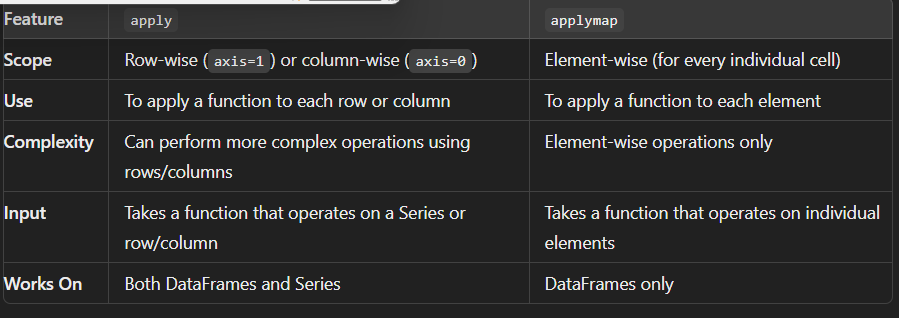

In [89]:
# groupby on multiple cols
multi_groupby = movies.groupby(["Star1","Director"])
multi_groupby

In [90]:
multi_groupby.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore,Normalized_Rating
0,300,2006,117,Action,7.6,Zack Snyder,Gerard Butler,732876,210614939,52.0,0.000000
1,1917,2019,119,Drama,8.3,Sam Mendes,Dean-Charles Chapman,425844,159227644,78.0,0.411765
2,(500) Days of Summer,2009,95,Comedy,7.7,Marc Webb,Zooey Deschanel,472242,32391374,76.0,0.058824
3,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000,96.0,0.823529
4,12 Years a Slave,2013,134,Biography,8.1,Steve McQueen,Chiwetel Ejiofor,640533,56671993,96.0,0.294118
...,...,...,...,...,...,...,...,...,...,...,...
995,Zodiac,2007,157,Crime,7.7,David Fincher,Jake Gyllenhaal,466080,33080084,78.0,0.058824
996,Zombieland,2009,88,Adventure,7.6,Ruben Fleischer,Jesse Eisenberg,520041,75590286,73.0,0.000000
997,Zootopia,2016,108,Animation,8.0,Byron Howard,Rich Moore,434143,341268248,78.0,0.235294
998,Zulu,1964,138,Drama,7.7,Cy Endfield,Stanley Baker,35999,790226546,77.0,0.058824


In [94]:
multi_groupby.size()

Star1                 Director            
Aamir Khan            Ashutosh Gowariker      1
                      Farhan Akhtar           1
                      Nitesh Tiwari           1
                      Rajkumar Hirani         2
                      Rajkumar Santoshi       1
                                             ..
Zbigniew Zamachowski  Krzysztof Kieslowski    1
Zooey Deschanel       Marc Webb               1
Çetin Tekindor        Çagan Irmak             1
Éric Toledano         Olivier Nakache         1
Ömer Faruk Sorak      Yilmaz Erdogan          1
Length: 898, dtype: int64

In [111]:
multi_groupby.get_group(("Amole Gupte","Aamir Khan"))

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore,Normalized_Rating
734,Taare Zameen Par,2007,165,Drama,8.4,Aamir Khan,Amole Gupte,168895,1223869,NaN,0.470588


In [118]:
# find the most earning director -- actor combo
multi_groupby["Gross"].max().sort_values(ascending=False).head(1)

Star1         Director   
Daisy Ridley  J.J. Abrams    936662225
Name: Gross, dtype: int64

In [143]:
combo = movies.groupby(["Star1","Genre"])

In [137]:
combo["Metascore"].mean().sort_values(ascending=False).head(1)

Star1           Genre
Ellar Coltrane  Drama    100.0
Name: Metascore, dtype: float64

In [140]:
combo.head(1)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore,Normalized_Rating
0,300,2006,117,Action,7.6,Zack Snyder,Gerard Butler,732876,210614939,52.0,0.000000
1,1917,2019,119,Drama,8.3,Sam Mendes,Dean-Charles Chapman,425844,159227644,78.0,0.411765
2,(500) Days of Summer,2009,95,Comedy,7.7,Marc Webb,Zooey Deschanel,472242,32391374,76.0,0.058824
3,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000,96.0,0.823529
4,12 Years a Slave,2013,134,Biography,8.1,Steve McQueen,Chiwetel Ejiofor,640533,56671993,96.0,0.294118
...,...,...,...,...,...,...,...,...,...,...,...
994,Zindagi Na Milegi Dobara,2011,155,Comedy,8.1,Zoya Akhtar,Hrithik Roshan,67927,3108485,NaN,0.294118
996,Zombieland,2009,88,Adventure,7.6,Ruben Fleischer,Jesse Eisenberg,520041,75590286,73.0,0.000000
997,Zootopia,2016,108,Animation,8.0,Byron Howard,Rich Moore,434143,341268248,78.0,0.235294
998,Zulu,1964,138,Drama,7.7,Cy Endfield,Stanley Baker,35999,790226546,77.0,0.058824


In [149]:
combo.agg(["min","max"])

Series_Title  \
                                                              min   
Star1                Genre                                          
Aamir Khan           Action                       Andaz Apna Apna   
                     Adventure  Lagaan: Once Upon a Time in India   
                     Comedy                              3 Idiots   
Aaron Taylor-Johnson Action                              Kick-Ass   
Abhay Deol           Drama                                  Dev.D   
...                                                           ...   
Zbigniew Zamachowski Comedy                 Trois couleurs: Blanc   
Zooey Deschanel      Comedy                  (500) Days of Summer   
Çetin Tekindor       Drama                         Babam ve Oglum   
Éric Toledano        Biography                   The Intouchables   
Ömer Faruk Sorak     Comedy                             Vizontele   

                                                                   \
                                                              max   
Star1                Genre                                          
Aamir Khan           Action                                Dangal   
                     Adventure  Lagaan: Once Upon a Time in India   
                     Comedy                       Rang De Basanti   
Aaron Taylor-Johnson Action                              Kick-Ass   
Abhay Deol           Drama                                  Dev.D   
...                                                           ...   
Zbigniew Zamachowski Comedy                 Trois couleurs: Blanc   
Zooey Deschanel      Comedy                  (500) Days of Summer   
Çetin Tekindor       Drama                         Babam ve Oglum   
Éric Toledano        Biography                   The Intouchables   
Ömer Faruk Sorak     Comedy                             Vizontele   

                               Released_Year       Runtime      IMDB_Rating  \
                                         min   max     min  max         min   
Star1                Genre                                                    
Aamir Khan           Action             1994  2016     160  161         8.2   
                     Adventure          2001  2001     224  224         8.1   
                     Comedy             2001  2014     153  183         8.1   
Aaron Taylor-Johnson Action             2010  2010     117  117         7.6   
Abhay Deol           Drama              2009  2009     144  144         8.0   
...                                      ...   ...     ...  ...         ...   
Zbigniew Zamachowski Comedy             1994  1994      92   92         7.6   
Zooey Deschanel      Comedy             2009  2009      95   95         7.7   
Çetin Tekindor       Drama              2005  2005     112  112         8.3   
Éric Toledano        Biography          2011  2011     112  112         8.5   
Ömer Faruk Sorak     Comedy             2001  2001     110  110         8.0   

                                                 Director  \
                                max                   min   
Star1                Genre                                  
Aamir Khan           Action     8.4         Nitesh Tiwari   
                     Adventure  8.1    Ashutosh Gowariker   
                     Comedy     8.4         Farhan Akhtar   
Aaron Taylor-Johnson Action     7.6        Matthew Vaughn   
Abhay Deol           Drama      8.0        Anurag Kashyap   
...                             ...                   ...   
Zbigniew Zamachowski Comedy     7.6  Krzysztof Kieslowski   
Zooey Deschanel      Comedy     7.7             Marc Webb   
Çetin Tekindor       Drama      8.3           Çagan Irmak   
Éric Toledano        Biography  8.5       Olivier Nakache   
Ömer Faruk Sorak     Comedy     8.0        Yilmaz Erdogan   

                                                        No_of_Votes          \
                                                    max         min     max   